In [2]:
import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, random_split, WeightedRandomSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt

Using device: cuda
Class distribution:
Early_Blight: 1303 images
Healthy: 816 images
Late_Blight: 1132 images


d:\Suchit\Potato-Leaf-Disease-Detection\venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\Suchit\Potato-Leaf-Disease-Detection\venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/25: 100%|██████████| 102/102 [01:09<00:00,  1.46batch/s, Loss=0.403]


Epoch 1/25, Train Loss: 0.4034, Val Loss: 0.2147, Val Acc: 92.79%
New best model saved with validation loss: 0.2147


Epoch 2/25: 100%|██████████| 102/102 [01:06<00:00,  1.53batch/s, Loss=0.225]


Epoch 2/25, Train Loss: 0.2246, Val Loss: 0.1767, Val Acc: 93.75%
New best model saved with validation loss: 0.1767


Epoch 3/25: 100%|██████████| 102/102 [01:06<00:00,  1.53batch/s, Loss=0.194]


Epoch 3/25, Train Loss: 0.1937, Val Loss: 0.1423, Val Acc: 94.23%
New best model saved with validation loss: 0.1423


Epoch 4/25: 100%|██████████| 102/102 [01:06<00:00,  1.53batch/s, Loss=0.177]


Epoch 4/25, Train Loss: 0.1767, Val Loss: 0.1063, Val Acc: 95.91%
New best model saved with validation loss: 0.1063


Epoch 5/25: 100%|██████████| 102/102 [01:06<00:00,  1.53batch/s, Loss=0.152]


Epoch 5/25, Train Loss: 0.1524, Val Loss: 0.1342, Val Acc: 96.15%


Epoch 6/25: 100%|██████████| 102/102 [01:06<00:00,  1.53batch/s, Loss=0.156]


Epoch 6/25, Train Loss: 0.1561, Val Loss: 0.0980, Val Acc: 96.15%
New best model saved with validation loss: 0.0980


Epoch 7/25: 100%|██████████| 102/102 [01:06<00:00,  1.53batch/s, Loss=0.138]


Epoch 7/25, Train Loss: 0.1377, Val Loss: 0.0986, Val Acc: 96.15%


Epoch 8/25: 100%|██████████| 102/102 [01:09<00:00,  1.46batch/s, Loss=0.138]


Epoch 8/25, Train Loss: 0.1382, Val Loss: 0.0739, Val Acc: 97.12%
New best model saved with validation loss: 0.0739


Epoch 9/25: 100%|██████████| 102/102 [01:14<00:00,  1.36batch/s, Loss=0.153]


Epoch 9/25, Train Loss: 0.1532, Val Loss: 0.0914, Val Acc: 97.12%


Epoch 10/25: 100%|██████████| 102/102 [01:14<00:00,  1.37batch/s, Loss=0.137]


Epoch 10/25, Train Loss: 0.1368, Val Loss: 0.0957, Val Acc: 96.88%


Epoch 11/25: 100%|██████████| 102/102 [01:14<00:00,  1.38batch/s, Loss=0.115]


Epoch 11/25, Train Loss: 0.1148, Val Loss: 0.1275, Val Acc: 96.63%


Epoch 12/25: 100%|██████████| 102/102 [01:09<00:00,  1.48batch/s, Loss=0.105]


Epoch 12/25, Train Loss: 0.1045, Val Loss: 0.0910, Val Acc: 96.63%


Epoch 13/25: 100%|██████████| 102/102 [01:06<00:00,  1.52batch/s, Loss=0.0955]


Epoch 13/25, Train Loss: 0.0955, Val Loss: 0.0737, Val Acc: 97.60%
New best model saved with validation loss: 0.0737


Epoch 14/25: 100%|██████████| 102/102 [01:13<00:00,  1.40batch/s, Loss=0.0746]


Epoch 14/25, Train Loss: 0.0746, Val Loss: 0.0940, Val Acc: 96.63%


Epoch 15/25: 100%|██████████| 102/102 [01:15<00:00,  1.36batch/s, Loss=0.0832]


Epoch 15/25, Train Loss: 0.0832, Val Loss: 0.1079, Val Acc: 95.43%


Epoch 16/25: 100%|██████████| 102/102 [01:15<00:00,  1.35batch/s, Loss=0.0829]


Epoch 16/25, Train Loss: 0.0829, Val Loss: 0.0621, Val Acc: 97.60%
New best model saved with validation loss: 0.0621


Epoch 17/25: 100%|██████████| 102/102 [01:15<00:00,  1.35batch/s, Loss=0.0736]


Epoch 17/25, Train Loss: 0.0736, Val Loss: 0.0670, Val Acc: 97.12%


Epoch 18/25: 100%|██████████| 102/102 [01:15<00:00,  1.35batch/s, Loss=0.0771]


Epoch 18/25, Train Loss: 0.0771, Val Loss: 0.0556, Val Acc: 97.12%
New best model saved with validation loss: 0.0556


Epoch 19/25: 100%|██████████| 102/102 [01:24<00:00,  1.21batch/s, Loss=0.0874]


Epoch 19/25, Train Loss: 0.0874, Val Loss: 0.0596, Val Acc: 97.60%


Epoch 20/25: 100%|██████████| 102/102 [01:25<00:00,  1.20batch/s, Loss=0.0689]


Epoch 20/25, Train Loss: 0.0689, Val Loss: 0.0750, Val Acc: 97.12%


Epoch 21/25: 100%|██████████| 102/102 [01:24<00:00,  1.20batch/s, Loss=0.0851]


Epoch 21/25, Train Loss: 0.0851, Val Loss: 0.0770, Val Acc: 97.60%


Epoch 22/25: 100%|██████████| 102/102 [01:24<00:00,  1.21batch/s, Loss=0.0614]


Epoch 22/25, Train Loss: 0.0614, Val Loss: 0.0526, Val Acc: 98.08%
New best model saved with validation loss: 0.0526


Epoch 23/25: 100%|██████████| 102/102 [01:24<00:00,  1.20batch/s, Loss=0.0645]


Epoch 23/25, Train Loss: 0.0645, Val Loss: 0.0573, Val Acc: 98.08%


Epoch 24/25: 100%|██████████| 102/102 [01:24<00:00,  1.21batch/s, Loss=0.0768]


Epoch 24/25, Train Loss: 0.0768, Val Loss: 0.0777, Val Acc: 96.88%


Epoch 25/25: 100%|██████████| 102/102 [01:24<00:00,  1.20batch/s, Loss=0.0701]


Epoch 25/25, Train Loss: 0.0701, Val Loss: 0.0612, Val Acc: 97.36%


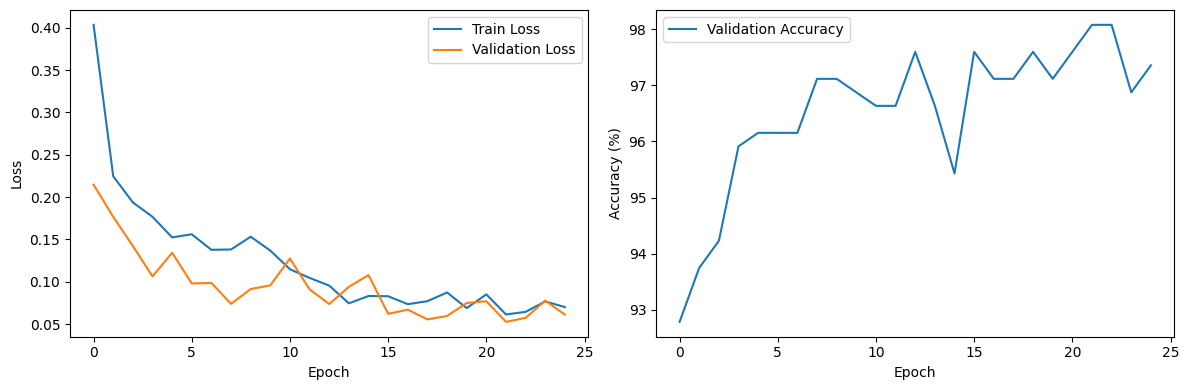

Extracting features for Random Forest training...


Processing training data: 100%|██████████| 102/102 [01:08<00:00,  1.49it/s]


Training Random Forest classifier...
Extracting features for validation...


Processing validation data: 100%|██████████| 13/13 [00:02<00:00,  4.34it/s]



Random Forest Model Performance:
Accuracy: 0.9663
Precision: 0.9672
Recall: 0.9663
F1 Score: 0.9662


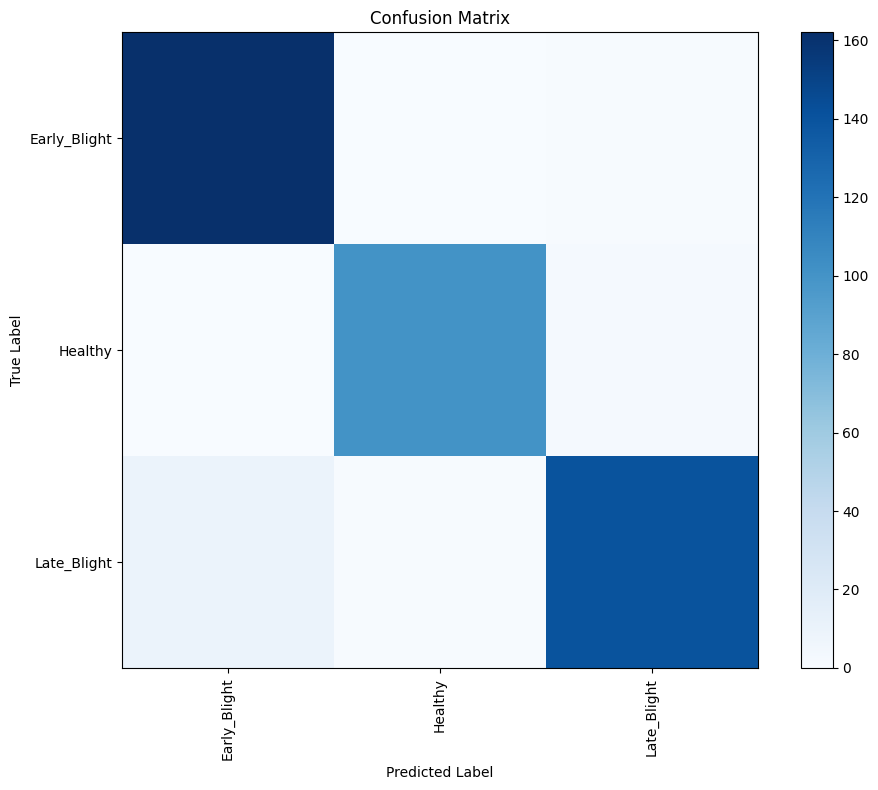

In [10]:
# Paths and Parameters
img_height, img_width = 224, 224
batch_size = 32
num_epochs = 25  # Increased from 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Enhanced Data Transforms with Augmentation
train_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transforms = transforms.Compose([
    transforms.Resize((img_height, img_width)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load Dataset with class-balanced sampling
full_dataset = datasets.ImageFolder('./potato/Training', transform=None)

# Check class distribution
class_counts = [0] * len(full_dataset.classes)
for _, class_idx in full_dataset.samples:
    class_counts[class_idx] += 1

print("Class distribution:")
for i, count in enumerate(class_counts):
    print(f"{full_dataset.classes[i]}: {count} images")

# Create the datasets with custom transforms
train_dataset = datasets.ImageFolder('./potato/Training', transform=train_transforms)
val_dataset = datasets.ImageFolder('./potato/Validation', transform=val_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Load ResNet50
resnet50 = models.resnet50(pretrained=True)

# Freeze all layers except the last 10
for name, param in list(resnet50.named_parameters())[:-10]:
    param.requires_grad = False

# Replace fully connected layer with Identity for feature extraction
resnet50.fc = nn.Identity()
resnet50 = resnet50.to(device)

class TomatoDiseaseCNN(nn.Module):
    def __init__(self, num_classes):
        super(TomatoDiseaseCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(2048, 1024, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.Dropout2d(0.2),

            nn.Conv2d(1024, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.Dropout2d(0.2),

            nn.Conv2d(512, 256, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Dropout2d(0.2),

            nn.Conv2d(256, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Dropout2d(0.2),

            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Dropout2d(0.2),

            nn.AdaptiveAvgPool2d((1, 1))
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


# Combine ResNet50 and Custom CNN
class ResNet50WithCNN(nn.Module):
    def __init__(self, resnet, custom_cnn):
        super(ResNet50WithCNN, self).__init__()
        self.resnet = resnet
        self.cnn = custom_cnn
    
    def forward(self, x):
        x = self.resnet(x)  # Extract features using ResNet50
        x = x.view(x.size(0), 2048, 1, 1)  # Reshape to [batch_size, 2048, 1, 1]
        x = x.expand(-1, 2048, 7, 7)  # Match dimensions for the CNN input
        x = self.cnn(x)  # Pass to custom CNN
        return x

# Initialize Models
num_classes = len(full_dataset.classes)
custom_cnn = TomatoDiseaseCNN(num_classes).to(device)
model = ResNet50WithCNN(resnet50, custom_cnn).to(device)

# Loss and Optimizer with learning rate scheduler
weights = torch.tensor([1.0 / count for count in class_counts], device=device)
criterion = nn.CrossEntropyLoss(weight=weights)
optimizer = optim.AdamW([
    {'params': resnet50.parameters(), 'lr': 0.0001},
    {'params': custom_cnn.parameters(), 'lr': 0.001}
], weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)

# Training Loop with Validation and Early Stopping
best_val_loss = float('inf')
patience = 5
patience_counter = 0
best_model_state = None
history = {'train_loss': [], 'val_loss': [], 'val_acc': []}

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    
    with tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch") as pbar:
        for inputs, labels in pbar:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            pbar.set_postfix({"Loss": running_loss / (pbar.n + 1)})
    
    train_loss = running_loss / len(train_loader)
    history['train_loss'].append(train_loss)
    
    # Validation phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss = val_loss / len(val_loader)
    val_acc = 100 * correct / total
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)
    
    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {train_loss:.4f}, "
          f"Val Loss: {val_loss:.4f}, "
          f"Val Acc: {val_acc:.2f}%")
    
    # Learning rate scheduler
    scheduler.step(val_loss)
    
    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_model_state = {
            'resnet': resnet50.state_dict(),
            'cnn': custom_cnn.state_dict()
        }
        print(f"New best model saved with validation loss: {best_val_loss:.4f}")
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs")
            break

# Load the best model
if best_model_state is not None:
    resnet50.load_state_dict(best_model_state['resnet'])
    custom_cnn.load_state_dict(best_model_state['cnn'])
    model = ResNet50WithCNN(resnet50, custom_cnn).to(device)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.tight_layout()
plt.savefig('training_history.png')
plt.show()

# Extract Features for Random Forest
features = []
labels = []
model.eval()

print("Extracting features for Random Forest training...")
with torch.no_grad():
    for inputs, label in tqdm(train_loader, desc="Processing training data"):
        inputs = inputs.to(device)
        feature = model(inputs).cpu().numpy()
        features.extend(feature)
        labels.extend(label.numpy())

# Train Random Forest with optimized hyperparameters
print("Training Random Forest classifier...")
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=True,
    class_weight='balanced',
    random_state=42
)
rf.fit(features, labels)

# Validate Random Forest
val_features = []
val_labels = []
print("Extracting features for validation...")
with torch.no_grad():
    for inputs, label in tqdm(val_loader, desc="Processing validation data"):
        inputs = inputs.to(device)
        feature = model(inputs).cpu().numpy()
        val_features.extend(feature)
        val_labels.extend(label.numpy())

rf_predictions = rf.predict(val_features)

# Calculate metrics
accuracy = accuracy_score(val_labels, rf_predictions)
precision = precision_score(val_labels, rf_predictions, average='weighted')
recall = recall_score(val_labels, rf_predictions, average='weighted')
f1 = f1_score(val_labels, rf_predictions, average='weighted')

print("\nRandom Forest Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Display confusion matrix
conf_matrix = confusion_matrix(val_labels, rf_predictions)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

class_names = full_dataset.classes
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=90)
plt.yticks(tick_marks, class_names)

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

# Save the complete model (ResNet50 + CNN + RandomForest)
models_to_save = {
    'resnet_state_dict': resnet50.state_dict(),
    'cnn_state_dict': custom_cnn.state_dict(),
    'rf_model': rf,
    'class_names': full_dataset.classes
}
torch.save(models_to_save, 'potato_disease_model_combined.pth')

In [11]:
print('final model evaluation metrics')
test_data = datasets.ImageFolder('./potato/Testing', transform= val_transforms)
test_loader = DataLoader(test_data, batch_size= batch_size, shuffle= False)
all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        val, ind = torch.max(outputs, dim = 1)
        all_preds.extend(ind.to('cpu'))
        all_labels.extend(labels.to('cpu'))
from sklearn.metrics import  accuracy_score, recall_score, f1_score, precision_score
print(accuracy_score(all_preds, all_labels))
print(recall_score(all_preds, all_labels, average= 'weighted'))
print(f1_score(all_preds, all_labels, average= 'weighted'))
print(precision_score(all_preds, all_labels, average= 'weighted'))

final model evaluation metrics
0.980246913580247
0.980246913580247
0.9801794042543809
0.9804961009980658
